# **Introduction to Regression with `sklearn`**

This Python notebook provides an introduction to regression using the [`sklearn` library](https://scikit-learn.org/stable/index.html). It uses the diabetes dataset ([link](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)) for demonstration purposes. The dataset consists of Ten baseline variables, **age, sex, body mass index, average blood pressure**, and six **blood serum measurements** for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of **disease progression one year** after baseline.

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

# **Load the Diabetes dataset**

In [ ]:
# Load the Diabetes dataset
url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
data = pd.read_csv(url, sep='\t')

data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
# Extract the 'BMI' feature as the independent variable X and the target variable y
X = data['BMI'].values
y = data['Y'].values

# **Split the dataset to *train*, *validation* and *test* sets**

Before visualizing the data it is very important to split the dataset into *train*, *validation* and *test* sets. The reason for doing this is that in a real world scenario we should be making the predictions on the **unseen test set**. Therefore, the test dataset should not be visualized or used in any way before the model is trained.

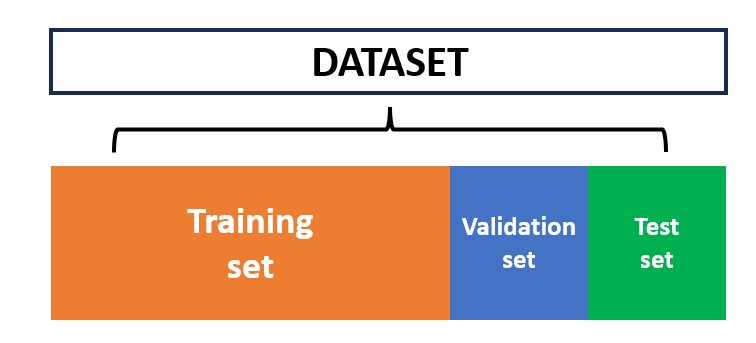


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training validation and test sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(282,)
(282,)
(71,)
(71,)
(89,)
(89,)


In [ ]:
X_train.reshape(-1, 1).shape

(282, 1)

# **Visualizing the Dataset**

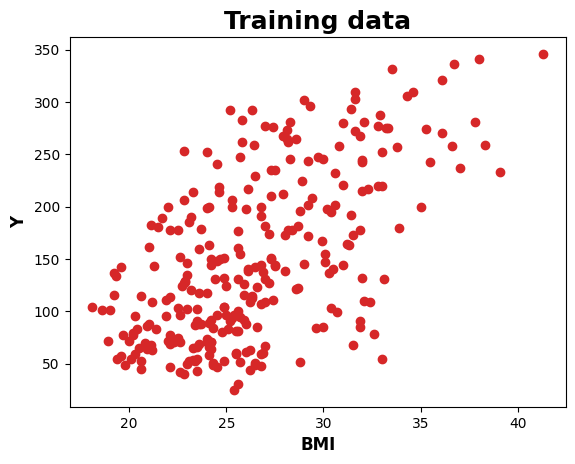

In [ ]:
# Plot the scatter plot of input and output data
plt.scatter(X_train, y_train, color="tab:red")
plt.xlabel('BMI', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.title('Training data',  fontsize=18, fontweight='bold')
plt.show()

# **Training a Linear Regression model**

Details about ```sklearn```'s ```LinearRegression``` function can be seen [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

## **Model Training and Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics

# Train a linear regression model
regr = LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
y_pred_train = regr.predict(X_train.reshape(-1, 1))
y_pred_val = regr.predict(X_val.reshape(-1, 1))
y_pred_test = regr.predict(X_test.reshape(-1, 1))

In [ ]:
# Train a linear regression model
regr = LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
y_pred_train = regr.predict(X_train.reshape(-1, 1))
y_pred_val = regr.predict(X_val.reshape(-1, 1))
y_pred_test = regr.predict(X_test.reshape(-1, 1))

**Mean Squared Error** (MSE) is  the average squared difference between the estimated values and the actual value.

\begin{equation}
MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y_i})}^2
\end{equation}

**Coefficient of determination** ($R^2$) is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

\begin{equation}
{R}^2 = 1 - \frac{\sum_{i=1}^{n}{(Y_i - \hat{Y_i})}^2}{\sum_{i=1}^{n}{(Y_i - \bar{Y})}}
\end{equation}

In [ ]:
# Print the coefficients (slope)
print("Coefficients: \n", regr.coef_[0])

# Print the intercept (bias)
print("Intercept: \n", regr.intercept_)

# Print the final equation of the line
print("\ny = {:.2f}*bmi + {:.2f}".format(regr.coef_[0], regr.intercept_))

# Print the mean squared error
print("\nMean squared error on validation data: %.2f" % sklearn.metrics.mean_squared_error(y_val, y_pred_val))

# Print the coefficient of determination (R^2 score)
print("Coefficient of determination (validation data): %.2f" % sklearn.metrics.r2_score(y_val, y_pred_val))

Coefficients: 
 10.823967034046886
Intercept: 
 -136.5754909723766

y = 10.82*bmi + -136.58

Mean squared error on validation data: 3734.58
Coefficient of determination (validation data): 0.31


# **Model Visualization**

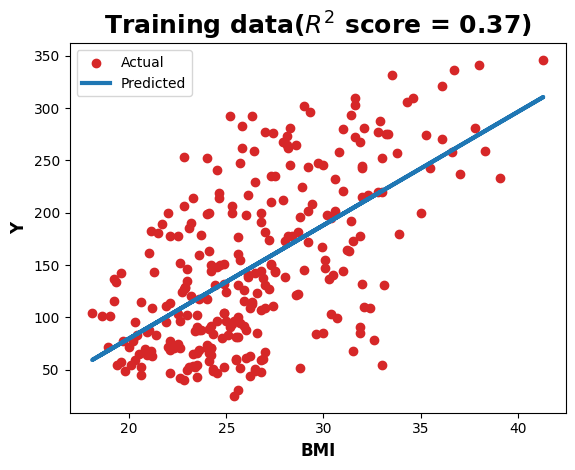

In [ ]:
plt.scatter(X_train, y_train, color="tab:red", label="Actual")
plt.plot(X_train, y_pred_train, color="tab:blue", linewidth=3, label="Predicted")
plt.xlabel('BMI', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.legend()
plt.title(f'Training data($R^2$ score = {sklearn.metrics.r2_score(y_train, y_pred_train):.2f})',  fontsize=18, fontweight='bold')
plt.show()

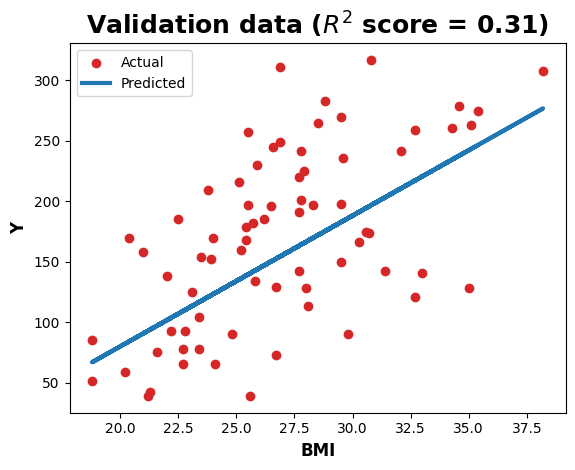

In [ ]:
plt.scatter(X_val, y_val, color="tab:red", label="Actual")
plt.plot(X_val, y_pred_val, color="tab:blue", linewidth=3, label="Predicted")
plt.xlabel('BMI', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.legend()
plt.title(f'Validation data ($R^2$ score = {sklearn.metrics.r2_score(y_val, y_pred_val):.2f})',  fontsize=18, fontweight='bold')
plt.show()

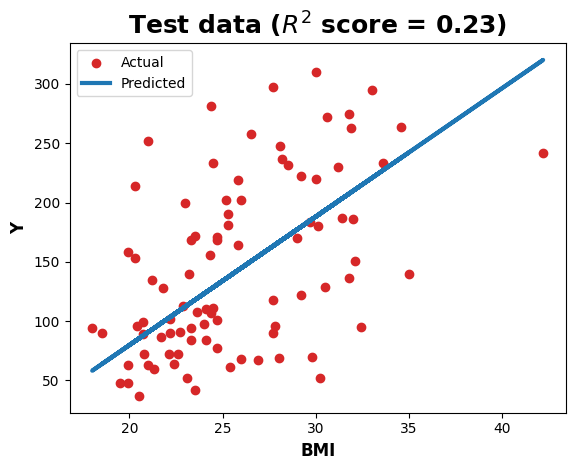

In [ ]:
# Plot the scatter plot of the test data and the predicted values
plt.scatter(X_test, y_test, color="tab:red", label="Actual")
plt.plot(X_test, y_pred_test, color="tab:blue", linewidth=3, label="Predicted")
plt.xlabel('BMI', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.legend()
plt.title(f'Test data ($R^2$ score = {sklearn.metrics.r2_score(y_test, y_pred_test):.2f})',  fontsize=18, fontweight='bold')
plt.show()